In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Load data from file

In [2]:
random.seed(0)


def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    n = len(features_X)
    features_X = np.c_[np.ones((n, 1)), features_X]
    return features_X, sales_Y

In [3]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


## Create individual


In [5]:
def create_individual(n=4, bound=10):
    individual = []
    for _ in range(4):
        individual.append((random.random() - 0.5)*bound)
    return individual


individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


## Compute fitness

In [6]:
features_X, sales_Y = load_data_from_file()


def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    fitness_value = 1/(loss + 1)
    return fitness_value

In [7]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


## CrossOver

In [8]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    n = len(individual1_new)
    for i in range(n):
        xs = random.random()
        if (xs < crossover_rate):
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new

In [9]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print(" individual1 : ", individual1)
print(" individual2 : ", individual2)

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


## Mutation

In [10]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    n = len(individual_m)
    for i in range(n):
        if np.random.rand() < mutation_rate:
            individual_m[i] = (random.random() - 0.5)*10

    return individual_m

In [11]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


## Initialize Population 

In [12]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

## Selection

In [13]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

## New population

In [27]:
random.seed(0)

In [28]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print(" Best loss :", compute_loss(sorted_population[m - 1]), " with chromsome : ",
              sorted_population[m - 1])

    new_population = []
    while len(new_population) < m - elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)
        # crossover
        individual1_new, individual2_new = crossover(
            individual_s1, individual_s2)
        # mutation
        individual_m1 = mutate(individual1_new)
        individual_m2 = mutate(individual2_new)
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)
    return new_population, compute_loss(sorted_population[m - 1])

In [21]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

 Best loss : 123415.051528805  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [32]:
def run_GA():
    n_generations = 100
    m = 600  # số cá thể
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, best_loss = create_new_population(
            population, elitism=2, gen=i)
        losses_list.append(best_loss)
    return losses_list, population

 Best loss : 2137.5247731782715  with chromsome :  [3.2814522778695574, 0.48075848139639943, -1.2980089478240209, -0.7145128522782429]
 Best loss : 1725.6751027277235  with chromsome :  [-1.4662537660921915, 0.1362787096565321, -2.417247241474245, 1.5614748725767502]
 Best loss : 1058.4602500970398  with chromsome :  [-3.7561205090622307, -0.19347060305280883, 0.2175851555141195, 1.0780584402206839]
 Best loss : 637.6898686692816  with chromsome :  [-2.0777751752455487, -0.1549894944732766, 0.9205372285897084, 0.22726971586737532]
 Best loss : 500.8172233533959  with chromsome :  [-4.007571849828892, -0.05910797079397345, 1.2389310460661374, 0.22726971586737532]
 Best loss : 416.0144676239048  with chromsome :  [-2.897352788865315, -0.019536808184424936, 1.0787980960776367, 0.20952254132597714]
 Best loss : 416.0144676239048  with chromsome :  [-2.897352788865315, -0.019536808184424936, 1.0787980960776367, 0.20952254132597714]
 Best loss : 283.6431423563076  with chromsome :  [-2.89735

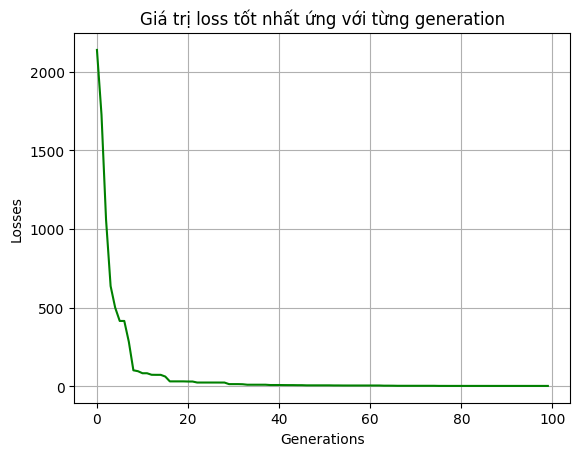

In [33]:
import matplotlib . pyplot as plt
import matplotlib . pyplot as plt


def visualize_loss(losses_list):
    plt.plot(losses_list, color='green')
    plt.xlabel('Generations')
    plt.ylabel('Losses')
    plt.title('Giá trị loss tốt nhất ứng với từng generation')
    plt.grid(True)
    plt.show()


losses_list, population = run_GA()
visualize_loss(losses_list)

[4.964384842613687, 0.04655179749909144, 0.10970956193114834, 0.023236012597076527]


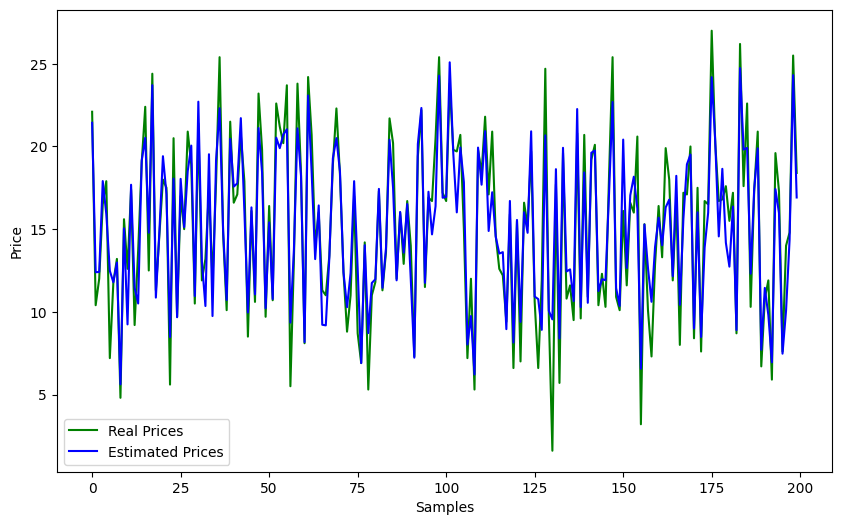

In [34]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c*x for x, c in zip(feature, theta))
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()


visualize_predict_gt()

[4.964384842613687, 0.04655179749909144, 0.10970956193114834, 0.023236012597076527]


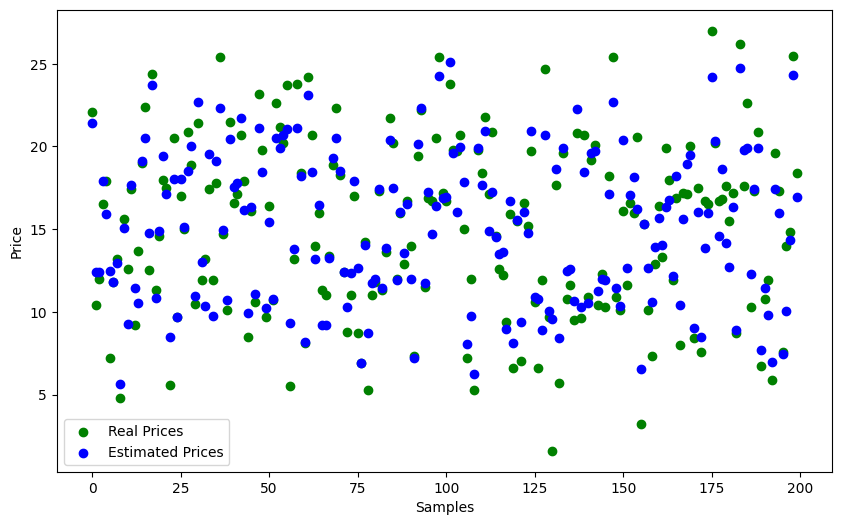

In [35]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()